# TSAI Assignment 7 - Code 9

### Model9:
###### Target
Improve accuracy to meet target. Use Squeeze-Expand model. LROnPlateau + Data Augmentation
###### Result
Model Parameters - 7,356
Train Accuracy - 99.31%
Test accuracy - 99.46%%
##### Analysis
Reached our required target!
We go with this model

In [1]:
from utils import torch,nn,F,optim,datasets,transforms
import utils

Create Train and test Transforms - use utils module

In [2]:
# Data transformation parameters
centerCrop = 22
resize = 28
randomRotate = 7.
mean = 0.1307
std_dev = 0.3081

#Get train data transformation
train_transforms = utils.getTrainTransforms_CropRotate(centerCrop, resize, randomRotate, mean,std_dev)

#Get Test data transformations
test_transforms = utils.getTestTransforms(mean,std_dev)

Get the MNIST data - train dataset and test dataset

In [3]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

Get the train_loader and test_loader -  batches of data used in model training/testing

In [4]:
batch_size = 256

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)

## MODEL - 9

In [5]:
from models import model_9
myNextModel = model_9.getModel()

In [6]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

optimizer = optim.SGD(myNextModel.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor=0.5, patience=3, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  tr_Acc, tr_loss = utils.train(myNextModel, train_loader, optimizer, criterion)
  tst_acc, tst_loss = utils.test(myNextModel, test_loader, criterion)
  train_acc.append(tr_Acc)
  train_losses.append(tr_loss)
  test_acc.append(tst_acc)
  test_losses.append(tst_loss)
  scheduler.step(tst_acc[0])

Epoch 1


  0%|                                                                                          | 0/235 [00:00<?, ?it/s]D:\SRT_Courses\MachineLearning\TSAI\Session7\S7\models\model_9.py:59: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
Train: Loss=0.1358 Batch_id=234 Accuracy=95.38: 100%|████████████████████████████████| 235/235 [00:36<00:00,  6.38it/s]


Test set: Average loss: 0.0452, Accuracy: 9867/10000 (98.67%)

Epoch 2


Train: Loss=0.0247 Batch_id=234 Accuracy=98.12: 100%|████████████████████████████████| 235/235 [00:13<00:00, 17.20it/s]


Test set: Average loss: 0.0358, Accuracy: 9893/10000 (98.93%)

Epoch 3


Train: Loss=0.0545 Batch_id=234 Accuracy=98.48: 100%|████████████████████████████████| 235/235 [00:14<00:00, 15.73it/s]


Test set: Average loss: 0.0360, Accuracy: 9895/10000 (98.95%)

Epoch 4


Train: Loss=0.0499 Batch_id=234 Accuracy=98.73: 100%|████████████████████████████████| 235/235 [00:13<00:00, 17.24it/s]


Test set: Average loss: 0.0278, Accuracy: 9917/10000 (99.17%)

Epoch 5


Train: Loss=0.0412 Batch_id=234 Accuracy=98.72: 100%|████████████████████████████████| 235/235 [00:12<00:00, 18.96it/s]


Test set: Average loss: 0.0284, Accuracy: 9912/10000 (99.12%)

Epoch 00005: reducing learning rate of group 0 to 5.0000e-02.
Epoch 6


Train: Loss=0.0596 Batch_id=234 Accuracy=98.97: 100%|████████████████████████████████| 235/235 [00:12<00:00, 19.23it/s]


Test set: Average loss: 0.0241, Accuracy: 9929/10000 (99.29%)

Epoch 7


Train: Loss=0.0118 Batch_id=234 Accuracy=99.00: 100%|████████████████████████████████| 235/235 [00:11<00:00, 19.69it/s]


Test set: Average loss: 0.0211, Accuracy: 9934/10000 (99.34%)

Epoch 8


Train: Loss=0.0290 Batch_id=234 Accuracy=99.08: 100%|████████████████████████████████| 235/235 [00:12<00:00, 19.54it/s]


Test set: Average loss: 0.0219, Accuracy: 9933/10000 (99.33%)

Epoch 9


Train: Loss=0.0569 Batch_id=234 Accuracy=99.16: 100%|████████████████████████████████| 235/235 [00:12<00:00, 19.34it/s]


Test set: Average loss: 0.0211, Accuracy: 9938/10000 (99.38%)

Epoch 00009: reducing learning rate of group 0 to 2.5000e-02.
Epoch 10


Train: Loss=0.0233 Batch_id=234 Accuracy=99.23: 100%|████████████████████████████████| 235/235 [00:12<00:00, 19.16it/s]


Test set: Average loss: 0.0193, Accuracy: 9941/10000 (99.41%)

Epoch 11


Train: Loss=0.0645 Batch_id=234 Accuracy=99.24: 100%|████████████████████████████████| 235/235 [00:12<00:00, 18.74it/s]


Test set: Average loss: 0.0213, Accuracy: 9935/10000 (99.35%)

Epoch 12


Train: Loss=0.0854 Batch_id=234 Accuracy=99.29: 100%|████████████████████████████████| 235/235 [00:11<00:00, 19.80it/s]


Test set: Average loss: 0.0187, Accuracy: 9942/10000 (99.42%)

Epoch 13


Train: Loss=0.0500 Batch_id=234 Accuracy=99.30: 100%|████████████████████████████████| 235/235 [00:12<00:00, 19.47it/s]


Test set: Average loss: 0.0189, Accuracy: 9942/10000 (99.42%)

Epoch 00013: reducing learning rate of group 0 to 1.2500e-02.
Epoch 14


Train: Loss=0.0215 Batch_id=234 Accuracy=99.36: 100%|████████████████████████████████| 235/235 [00:11<00:00, 19.67it/s]


Test set: Average loss: 0.0189, Accuracy: 9942/10000 (99.42%)

Epoch 15


Train: Loss=0.0179 Batch_id=234 Accuracy=99.36: 100%|████████████████████████████████| 235/235 [00:12<00:00, 19.30it/s]


Test set: Average loss: 0.0195, Accuracy: 9941/10000 (99.41%)

Epoch 16


Train: Loss=0.0477 Batch_id=234 Accuracy=99.38: 100%|████████████████████████████████| 235/235 [00:13<00:00, 17.99it/s]


Test set: Average loss: 0.0180, Accuracy: 9941/10000 (99.41%)

Epoch 17


Train: Loss=0.0023 Batch_id=234 Accuracy=99.33: 100%|████████████████████████████████| 235/235 [00:12<00:00, 18.33it/s]


Test set: Average loss: 0.0181, Accuracy: 9943/10000 (99.43%)

Epoch 00017: reducing learning rate of group 0 to 6.2500e-03.
Epoch 18


Train: Loss=0.0095 Batch_id=234 Accuracy=99.42: 100%|████████████████████████████████| 235/235 [00:12<00:00, 18.74it/s]


Test set: Average loss: 0.0177, Accuracy: 9948/10000 (99.48%)

Epoch 19


Train: Loss=0.0223 Batch_id=234 Accuracy=99.42: 100%|████████████████████████████████| 235/235 [00:13<00:00, 18.02it/s]


Test set: Average loss: 0.0177, Accuracy: 9947/10000 (99.47%)

Epoch 20


Train: Loss=0.0365 Batch_id=234 Accuracy=99.39: 100%|████████████████████████████████| 235/235 [00:13<00:00, 17.81it/s]


Test set: Average loss: 0.0181, Accuracy: 9944/10000 (99.44%)



Print the model summary to know your model

In [7]:
utils.printModelSummary(myNextModel,(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
              ReLU-6           [-1, 16, 24, 24]               0
       BatchNorm2d-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
         MaxPool2d-9           [-1, 16, 12, 12]               0
           Conv2d-10            [-1, 8, 12, 12]             136
      BatchNorm2d-11            [-1, 8, 12, 12]              16
           Conv2d-12           [-1, 16, 10, 10]           1,152
             ReLU-13           [-1, 16, 10, 10]               0
      BatchNorm2d-14           [-1, 16,

Plot the train and test accuracy

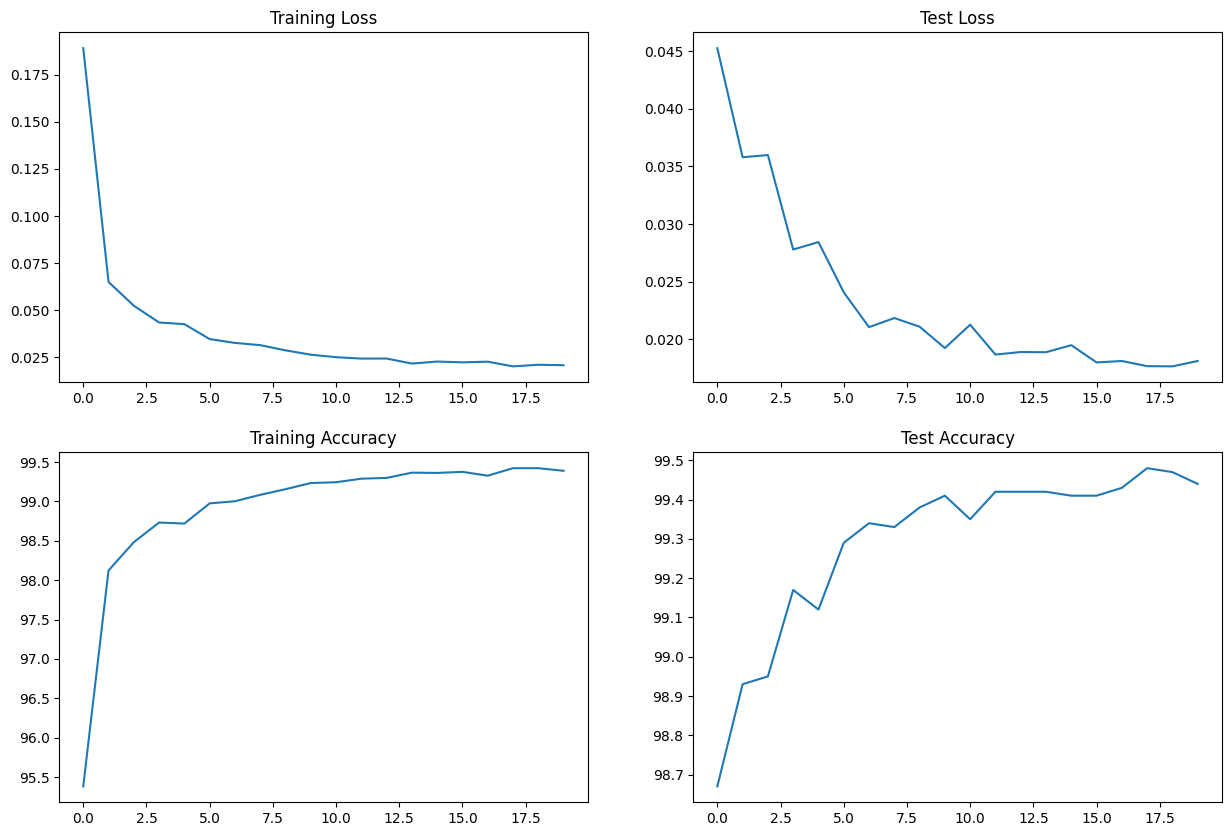

In [8]:
utils.printModelTrainTestAccuracy(train_acc, train_losses, test_acc, test_losses)